In [1]:
# Certify the installation
# !pip show pandas numpy scikit-learn joblib

In [2]:
# if not installed, install pyCaret (Optional)
# !pip install pyCaret --use-pep517

In [3]:
# Certify the pyCaret installation
# !pip show pyCaret

### Test

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9729,0.9969,0.9854,0.9489,0.9665,0.9437,0.9447,0.0430
ridge,Ridge Classifier,0.9729,0.9960,0.9854,0.9489,0.9665,0.9437,0.9447,0.0440
qda,Quadratic Discriminant Analysis,0.9600,0.9899,0.9963,0.9166,0.9533,0.9188,0.9232,0.0450
rf,Random Forest Classifier,0.9686,0.9891,0.9746,0.9486,0.9609,0.9347,0.9356,0.1470
et,Extra Trees Classifier,0.9714,0.9884,0.9819,0.9487,0.9647,0.9408,0.9415,0.1230
lr,Logistic Regression,0.9714,0.9861,0.9819,0.9489,0.9647,0.9408,0.9417,0.4010
gbc,Gradient Boosting Classifier,0.9657,0.9818,0.9673,0.9477,0.9571,0.9285,0.9292,0.1550
nb,Naive Bayes,0.9629,0.9779,0.9709,0.9391,0.9541,0.9230,0.9242,0.0440
svm,SVM - Linear Kernel,0.9457,0.9777,0.9415,0.9265,0.9320,0.8868,0.8895,0.0440
ada,Ada Boost Classifier,0.9514,0.9733,0.9493,0.9307,0.9394,0.8989,0.8997,0.0990


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9857,1.0000,1.0000,0.9655,0.9825,0.9704,0.9708
1,0.9429,0.9940,0.9643,0.9000,0.9310,0.8824,0.8839
2,0.9714,0.9940,0.9643,0.9643,0.9643,0.9405,0.9405
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9714,1.0000,1.0000,0.9333,0.9655,0.9412,0.9428
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9571,0.9940,1.0000,0.9000,0.9474,0.9114,0.9150
7,0.9857,0.9991,1.0000,0.9643,0.9818,0.9701,0.9705
8,0.9143,0.9845,0.9259,0.8621,0.8929,0.8216,0.8230


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


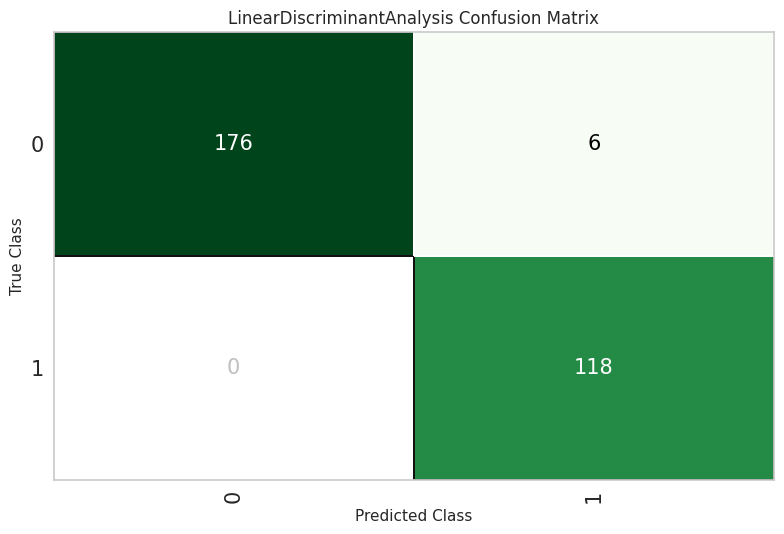

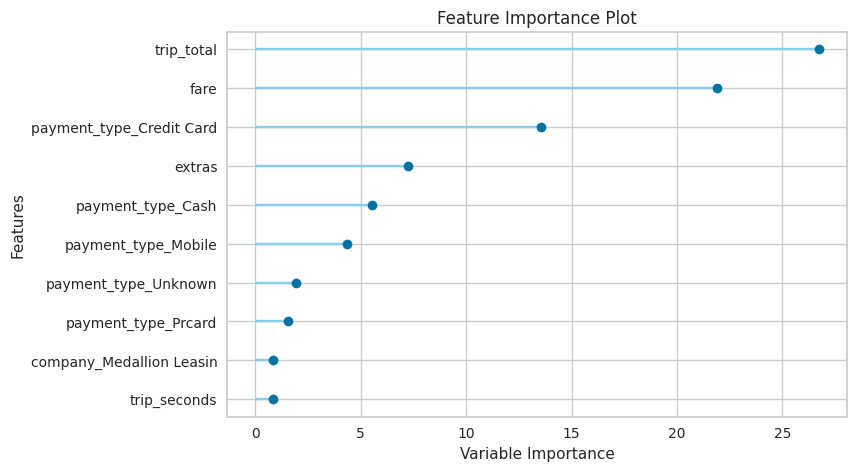

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['trip_seconds', 'trip_miles',
                                              'pickup_census_tract',
                                              'dropoff_census_tract',
                                              'pickup_community_area',
                                              'dropoff_community_area', 'fare',
                                              'tolls', 'extras', 'trip_total',
                                              'pickup_centroid_latitude',
                                              'pickup_centroid_longitude',
                                              'dropoff_centroid_latitude',
                                              '...
                                                               return_df=True,
                                                               use_cat_

In [4]:
import pandas as pd
from pycaret.classification import *

# CSVファイルの読み込み
data = pd.read_csv('taxi_2020_test_converted_1000.csv')

# PyCaretのセットアップ
classification_setup = setup(
    data=data,
    target='with_tip',             # 目的変数の指定（バイナリ分類）
    session_id=42,             # 再現性のための乱数シード
    normalize=True,            # データの正規化（オプション）
    verbose=False              # 詳細な出力を表示しないようにする
)

# モデルの比較 (AUCを基準に選択)
best_model = compare_models(sort='AUC')

# モデルのチューニング（AUCを最大化する形でハイパーパラメータの最適化）
tuned_model = tune_model(best_model, optimize='AUC')

# 最良モデルの結果を可視化
plot_model(tuned_model, plot='confusion_matrix')  # 混同行列
plot_model(tuned_model, plot='feature')          # 特徴量の重要度

# チューニング後の最良モデルを保存
save_model(tuned_model, 'best_model_with_tip')

### ZIP action

In [5]:
import zipfile

with zipfile.ZipFile('binary_model_package.zip', 'w') as zf:
    zf.write('best_model_with_tip.pkl')
    zf.write('requirements.txt')
    zf.write('pred.py')